In [ ]:
########################### AP156 Activity 1- Nica Jane Ferrer (2013-25765)####################################

### Questions:
#### How should the code be changed if I want the Greek symbol \pi instead?
# Just change Pi to $\pi$:
# plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", "$\pi$/4", "$\pi$/2", "3$\pi$/4", "$\pi$"])
# plt.yticks([0, 2, 4, 6, 8, 10], ["0", "2$\pi$", "4$\pi$", "6$\pi$", "8$\pi$", "10$\pi$"])

###### What other plot options for plt.xlabel are available?
#Other than the size of text, the color of the text in the label can be modified. 
#Also, symbols and Greek letters may be entered by typing it as if one is in the Markdown cell.

#### What would happen if plt.show() is not commented out? Try it.
# If plt.show() is not commented out, the output figures would appear one at a time. Otherwise, all of the figures appear simultaneously.

In [ ]:
#### Double-check the expressions sinuspsi and phinorm
# These expressions are consistent with eq 1.2 and 1.5 respectively

#### Where is the zero reference point of phi?
# The zero reference point of phi is the y-axis/vertical line

#### When phi/phi0 = 1, where is the bob?
# When phi/phi0 = 1, the bob is at its maximum angular displacement

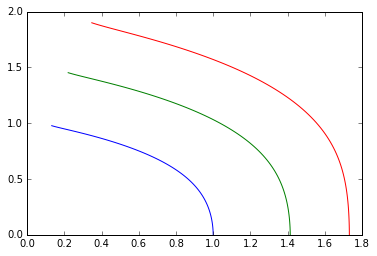

In [9]:
####ACTIVITY####
#Rewrite the code for Fig 1.4 so that the integration will be done numerically
#Profile both versions - see http://docs.python.org/library/profile.html

#RK4 was used to obtain phi values, and delta phi/delta t for the corresponding slope
%matplotlib inline
import numpy as np
from pylab import plot,xlabel,show,xlabel,ylabel,title,figure,xticks


Eovermgl = [-0.5, 0, 0.5, 1]
#thetas= phi0s = arccos(Eovermgl)
thetas = [60,90,120,360]
phi0s = []
for theta in thetas:
    radns = theta*np.pi/180
    phi0s.append(radns)
    

for k in phi0s:
    phivals= []
    def f(r,phi0):
        x = r
        fx = np.sqrt(1- (np.sin(phi0))**2 * (np.sin(x))**2 )
        return fx

    a = 0
    b = np.pi/2
    N = 100
    h = (b-a)/N

    tpoints = np.arange(a,b,h)
    xpoints = []
# r is psi, k is phi0
    r = 0.0
    for t in tpoints:
        phivals.append(2*np.arcsin(np.sin(k/2)*np.sin(r)))
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    dxdt = []
    times = []
    
    t =0.0
    for j in xrange(0,N-1):
        dx = (phivals[j+1] - phivals[j])/h
        dxdt.append(dx)
        t +=h
        times.append(t)
    finalphis = phivals[0:99]
    plot(dxdt,finalphis)
show()



Nonlinear Pendulum

2*pi + pi*sin(phi0/2)**2/2 + 9*pi*sin(phi0/2)**4/32 + 25*pi*sin(phi0/2)**6/128 + 1225*pi*sin(phi0/2)**8/8192 + 3969*pi*sin(phi0/2)**10/32768 + 53361*pi*sin(phi0/2)**12/524288 + 184041*pi*sin(phi0/2)**14/2097152 + 41409225*pi*sin(phi0/2)**16/536870912 + 147744025*pi*sin(phi0/2)**18/2147483648 + O(phi0**20)


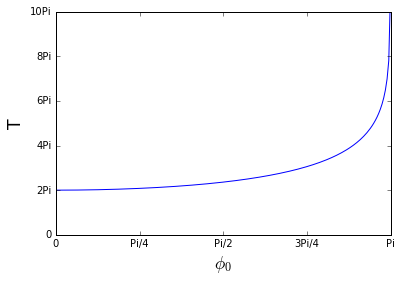

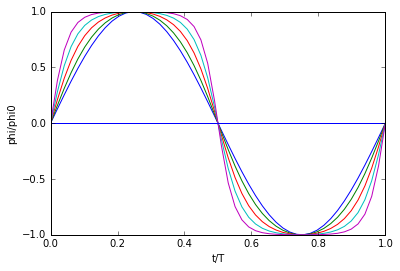

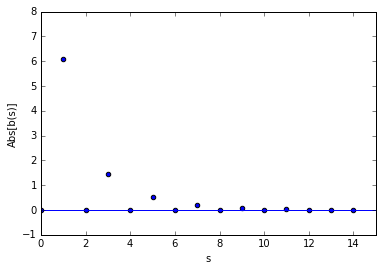

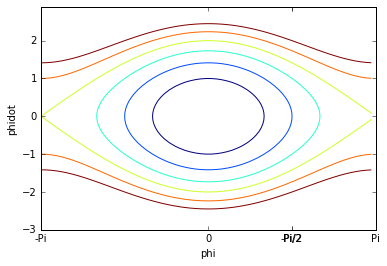

In [63]:

####EXTRAS####
#Save the figures to .pdf files (automatically)
#####Editing the code given



'''Adapted from Chapter 1.2 The Nonlinear Pendulum of
    Kinzel and Reents.
    Coded by: Christian Alis
    Annotated by: May Lim
    
    Shows Figs 1.1 - 1.4
'''

from scipy.special import ellipk, ellipj
from numpy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
import sympy
from matplotlib.backends.backend_pdf import PdfPages
f1 = PdfPages('f1.pdf')
f2 = PdfPages('f2.pdf')
f3 = PdfPages('f3.pdf')
f4 = PdfPages('f4.pdf')

print "\nNonlinear Pendulum\n"

#Eq 1.7 for period T, with \sqrt(l/g) = 1
def T(phi0):
    return 4*ellipk(np.sin(phi0/2)**2)
#Read help(ellipk) -- crucial info for phi0 = np.pi
#... and for figuring out the convention that is in use

#Alternative expression for Eq 1.7
#T = lambda phi0: 4*ellipk(np.sin(phi0/2)**2)

#Generate data for Fig 1.1 - period T as a function of amplitude phi0
phis = np.linspace(0, 3.14, 200)
ts = T(phis)

#Plotting routines for Fig 1.1: take note of...
# ... launch a new figure
plt.figure()
plt.plot(phis/np.pi, ts/np.pi)
plt.ylim(0, 30/np.pi)
plt.xlabel(r'$\phi_0$', size='xx-large')
plt.ylabel('T', rotation="vertical", size='xx-large')
#... tick labels
plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", "Pi/4", "Pi/2", "3Pi/4", "Pi"])
plt.yticks([0, 2, 4, 6, 8, 10], ["0", "2Pi", "4Pi", "6Pi", "8Pi", "10Pi"])
# plt.show()
plt.savefig(f1, format='pdf')

####QUESTIONS####
#How should the code be changed if I want the Greek symbol \pi instead?
#What other plot options for plt.xlabel are available?
#What would happen if plt.show() is not commented out? Try it.

#The function t(phi) is obtained from Eq 1.6, but we want to calculate
#the inverse phi(t) -- this is also available
#Check out: np.info(ellipj)
def sinuspsi(t, phi0):
    return ellipj(t, np.sin(phi0/2)**2)[0] 
#Alternatively,
#sinuspsi = lambda t, phi0: ellipj(t, np.sin(phi0/2)**2)[0]
#More info on the Jacobi elliptic function: 
#http://keisan.casio.com/has10/SpecExec.cgi?id=system/2006/1180573437
#Note the first element in the output of ellipj above is sn(u,k) is
#the left-hand term of Eq 1.5

#Eq 1.5 retrieves phi. Normalize by dividing with phi0
def phinorm(x, phi0):
    return 2*np.arcsin(np.sin(phi0/2) * sinuspsi(x*T(phi0), phi0))/phi0
#Alternatively,
#phinorm = lambda x, phi0: 2*np.arcsin(np.sin(phi0/2) * sinuspsi(x*T(phi0), phi0))/phi0

#Data/Plotting routines for Fig 1.2
phi0s = np.array([0.1, 0.8, 0.95, 0.99, 0.999]) * np.pi
tnorms = np.linspace(0,1)
phinorms = [phinorm(tnorms, phi0) for phi0 in phi0s]
plt.figure()
plt.plot(tnorms.T, np.transpose(phinorms))
plt.axhline(0)
plt.xlabel('t/T')
plt.ylabel('phi/phi0')
plt.savefig(f2, format='pdf')


####ACTIVITY/QUESTIONS####
#Double-check the expressions sinuspsi and phinorm
#Where is the zero reference point of phi?
#When phi/phi0 = 1, where is the bob?
#On the programming side, you may want to read about list comprehension 
#here http://www.python.org/dev/peps/pep-0202/

#Describe the anharmonic oscillations for an amplitude phi0 = 0.999*pi
#Data and plotting routines for Fig 1.3
list_ = phinorm(np.arange(0, 1, 0.01), 0.999*np.pi)
foulist = (np.abs(fft(list_))/np.sqrt(len(list_)))[:15]
plt.figure()
plt.scatter(range(15), foulist)
plt.axhline(0)
plt.xlim(0, 15)
plt.ylim(-1, 8)
plt.xlabel("s")
plt.ylabel("Abs[b(s)]")
plt.savefig(f3, format='pdf')


#Fig 1.4: phase-space plot of phidot vs. phi
#This code mirrors the symbolic source code of Mathematica
m = sympy.Symbol("m")
psi = sympy.Symbol("psi")
phi0 = sympy.Symbol("phi0")
f = 1/sympy.sqrt(1 - m*sympy.sin(psi)**2)
g = f.series(m, 0, 10)
tseries = 4*sympy.integrate(g, (psi, 0, sympy.pi/2))
print tseries.subs(m, sympy.sin(phi0/2)**2)

####ACTIVITY####
#Rewrite the code for Fig 1.4 so that the integration will be done numerically
#Profile both versions - see http://docs.python.org/library/profile.html

#Make a contour plot
def e(phidot, phi):
    return phidot**2/2. - np.cos(phi)
#Alternatively,
#e = lambda phidot, phi: phidot**2/2. - np.cos(phi)
#mgrid is an optimal way of creating a grid for evaluating a function
y, x = np.mgrid[-3:3:0.1, -np.pi:np.pi:0.1]
z = e(y, x)
plt.figure()
plt.contour(x/np.pi, y, z, levels=[-0.5, 0, 0.5, 1, 1.5, 2])
plt.xlabel("phi")
plt.ylabel("phidot")
plt.xticks([-1, 0.5, 0, 0.5, 1], ["-Pi", "-Pi/2", 0, "Pi/2", "Pi"])
plt.show()
plt.savefig(f4, format='pdf')
f1.close()
f2.close()
f3.close()
f4.close()





Nonlinear Pendulum

2*pi + pi*sin(phi0/2)**2/2 + 9*pi*sin(phi0/2)**4/32 + 25*pi*sin(phi0/2)**6/128 + 1225*pi*sin(phi0/2)**8/8192 + 3969*pi*sin(phi0/2)**10/32768 + 53361*pi*sin(phi0/2)**12/524288 + 184041*pi*sin(phi0/2)**14/2097152 + 41409225*pi*sin(phi0/2)**16/536870912 + 147744025*pi*sin(phi0/2)**18/2147483648 + O(phi0**20)


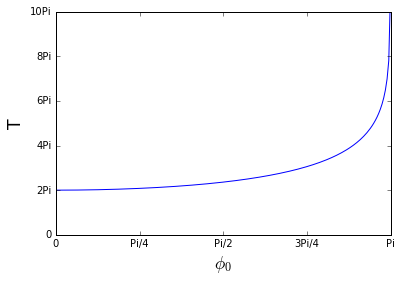

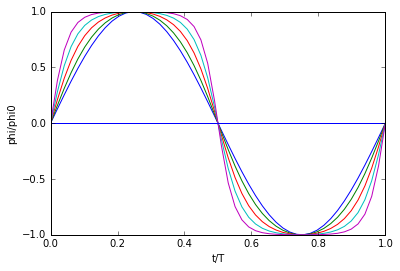

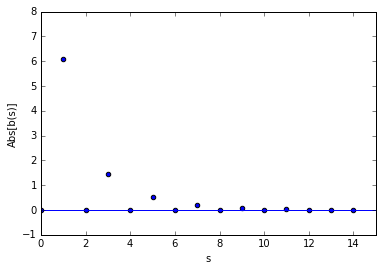

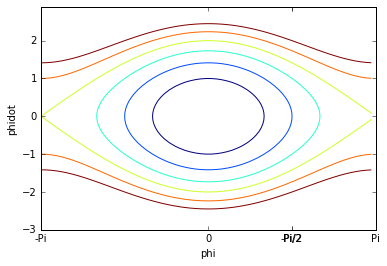

In [61]:
####EXTRAS####
#Save the figures with specific dimensions (e.g. width = 3 inches)
#####Editing the code given


'''Adapted from Chapter 1.2 The Nonlinear Pendulum of
    Kinzel and Reents.
    Coded by: Christian Alis
    Annotated by: May Lim
    
    Shows Figs 1.1 - 1.4
'''

from scipy.special import ellipk, ellipj
from numpy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
import sympy



print "\nNonlinear Pendulum\n"

#Eq 1.7 for period T, with \sqrt(l/g) = 1
def T(phi0):
    return 4*ellipk(np.sin(phi0/2)**2)
#Read help(ellipk) -- crucial info for phi0 = np.pi
#... and for figuring out the convention that is in use

#Alternative expression for Eq 1.7
#T = lambda phi0: 4*ellipk(np.sin(phi0/2)**2)

#Generate data for Fig 1.1 - period T as a function of amplitude phi0
phis = np.linspace(0, 3.14, 200)
ts = T(phis)

#Plotting routines for Fig 1.1: take note of...
# ... launch a new figure
fig1 = plt.figure()
plt.plot(phis/np.pi, ts/np.pi)
plt.ylim(0, 30/np.pi)
plt.xlabel(r'$\phi_0$', size='xx-large')
plt.ylabel('T', rotation="vertical", size='xx-large')
#... tick labels
plt.xticks([0, 0.25, 0.5, 0.75, 1], ["0", "Pi/4", "Pi/2", "3Pi/4", "Pi"])
plt.yticks([0, 2, 4, 6, 8, 10], ["0", "2Pi", "4Pi", "6Pi", "8Pi", "10Pi"])
plt.figure(figsize=(3,3))
fig1.savefig('fig1.png')
####QUESTIONS####
#How should the code be changed if I want the Greek symbol \pi instead?
#What other plot options for plt.xlabel are available?
#What would happen if plt.show() is not commented out? Try it.

#The function t(phi) is obtained from Eq 1.6, but we want to calculate
#the inverse phi(t) -- this is also available
#Check out: np.info(ellipj)
def sinuspsi(t, phi0):
    return ellipj(t, np.sin(phi0/2)**2)[0] 
#Alternatively,
#sinuspsi = lambda t, phi0: ellipj(t, np.sin(phi0/2)**2)[0]
#More info on the Jacobi elliptic function: 
#http://keisan.casio.com/has10/SpecExec.cgi?id=system/2006/1180573437
#Note the first element in the output of ellipj above is sn(u,k) is
#the left-hand term of Eq 1.5

#Eq 1.5 retrieves phi. Normalize by dividing with phi0
def phinorm(x, phi0):
    return 2*np.arcsin(np.sin(phi0/2) * sinuspsi(x*T(phi0), phi0))/phi0
#Alternatively,
#phinorm = lambda x, phi0: 2*np.arcsin(np.sin(phi0/2) * sinuspsi(x*T(phi0), phi0))/phi0

#Data/Plotting routines for Fig 1.2
phi0s = np.array([0.1, 0.8, 0.95, 0.99, 0.999]) * np.pi
tnorms = np.linspace(0,1)
phinorms = [phinorm(tnorms, phi0) for phi0 in phi0s]
fig2 = plt.figure()
plt.plot(tnorms.T, np.transpose(phinorms))
plt.axhline(0)
plt.xlabel('t/T')
plt.ylabel('phi/phi0')
plt.figure(figsize=(3,3))
fig2.savefig('fig2.png')

####ACTIVITY/QUESTIONS####
#Double-check the expressions sinuspsi and phinorm
#Where is the zero reference point of phi?
#When phi/phi0 = 1, where is the bob?
#On the programming side, you may want to read about list comprehension 
#here http://www.python.org/dev/peps/pep-0202/

#Describe the anharmonic oscillations for an amplitude phi0 = 0.999*pi
#Data and plotting routines for Fig 1.3
list_ = phinorm(np.arange(0, 1, 0.01), 0.999*np.pi)
foulist = (np.abs(fft(list_))/np.sqrt(len(list_)))[:15]
fig3 = plt.figure()
plt.scatter(range(15), foulist)
plt.axhline(0)
plt.xlim(0, 15)
plt.ylim(-1, 8)
plt.xlabel("s")
plt.ylabel("Abs[b(s)]")
plt.figure(figsize=(3,3))
fig3.savefig('fig3.png')


#Fig 1.4: phase-space plot of phidot vs. phi
#This code mirrors the symbolic source code of Mathematica
m = sympy.Symbol("m")
psi = sympy.Symbol("psi")
phi0 = sympy.Symbol("phi0")
f = 1/sympy.sqrt(1 - m*sympy.sin(psi)**2)
g = f.series(m, 0, 10)
tseries = 4*sympy.integrate(g, (psi, 0, sympy.pi/2))
print tseries.subs(m, sympy.sin(phi0/2)**2)

####ACTIVITY####
#Rewrite the code for Fig 1.4 so that the integration will be done numerically
#Profile both versions - see http://docs.python.org/library/profile.html

#Make a contour plot
def e(phidot, phi):
    return phidot**2/2. - np.cos(phi)
#Alternatively,
#e = lambda phidot, phi: phidot**2/2. - np.cos(phi)
#mgrid is an optimal way of creating a grid for evaluating a function
y, x = np.mgrid[-3:3:0.1, -np.pi:np.pi:0.1]
z = e(y, x)
fig4 = plt.figure()
plt.contour(x/np.pi, y, z, levels=[-0.5, 0, 0.5, 1, 1.5, 2])
plt.xlabel("phi")
plt.ylabel("phidot")
plt.xticks([-1, 0.5, 0, 0.5, 1], ["-Pi", "-Pi/2", 0, "Pi/2", "Pi"])
plt.figure(figsize=(3,3))
fig4.savefig('fig4.png')
